# Load packages and create data

In [1]:
## run this if you haven't already downloaded the packages

## this download the packages from the requirements.txt file
# pip install -r requirements.txt

## this will download the latest version of the packages which may not match the versions in the requirements.txt file
# pip install ipykernel matplotlib pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
data_fruit = pd.DataFrame({'Weight': [15, 18, 12,10],
                           'Price': [1,3,2,5]},
                           index = ['Orange','Apple','Banana','Grape'])

print("Fruit data:")
data_fruit.head()

Fruit data:


,Weight,Price
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


In [4]:
data_iris = pd.read_csv("Iris.csv", usecols=['SepalLengthCm', 'SepalWidthCm']) # We only want sepal features

print("Iris data:")
data_iris.head()

Iris data:


,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# Feature scaling

Sources of inspiration:
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://www.datacamp.com/tutorial/normalization-vs-standardization
- https://www.kaggle.com/code/mysarahmadbhat/all-about-feature-scaling

## StandardScaler

$$
x_{\text{MinMaxScaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

### ! QUESTIONS - MinMaxScaler
- What does this scaler do?
- What is the range of the data after using the scaler?
- What other properties does the data set have after using this scaler?
- When would be appropriate to use this scaler instead of another scaling method?

#### Example of MinMaxScaler on fruit data

In [5]:
print("""Raw data before scaling:""")

data_fruit

Raw data before scaling:


,Weight,Price
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


In [6]:
scale_fruit_minmax = MinMaxScaler()

data_fruit_minmaxscale_array = scale_fruit_minmax.fit_transform(data_fruit)
print("""After scaling: MinMaxScaler array output""")

data_fruit_minmaxscale_array

After scaling: MinMaxScaler array output


array([[0.625, 0.   ],
       [1.   , 0.5  ],
       [0.25 , 0.25 ],
       [0.   , 1.   ]])

In [7]:
data_fruit_minmaxscale_df = pd.DataFrame(data_fruit_minmaxscale_array, 
                                 columns=['Weight','Price'],
                                 index = ['Orange','Apple','Banana','Grape'])


print("""After scaling: MinMaxScaler dataframe output""")
data_fruit_minmaxscale_df

After scaling: MinMaxScaler dataframe output


,Weight,Price
Orange,0.625,0.00
Apple,1.000,0.50
Banana,0.250,0.25
Grape,0.000,1.00


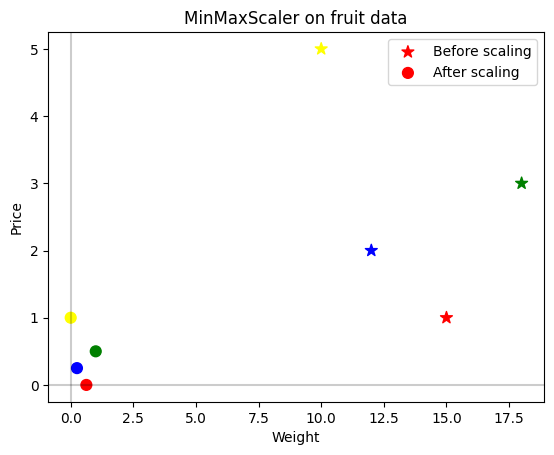

In [8]:
# Plot the original data and the scaled data

ax = data_fruit.plot.scatter(x='Weight',
                                      y='Price',
                                      color=['red','green','blue','yellow'], 
                                      marker = '*',
                                      s=80,
                                      label='Before scaling',
                                      title="MinMaxScaler on fruit data"
                                      "");

data_fruit_minmaxscale_df.plot.scatter(x='Weight',
                                       y='Price',
                                       color=['red','green','blue','yellow'],
                                       marker = 'o',
                                       s=60,
                                       label='After scaling',
                                       ax = ax);

plt.axhline(0, color='black',alpha=0.2)
plt.axvline(0, color='black',alpha=0.2);

#### Example of MinMaxScaler on iris data

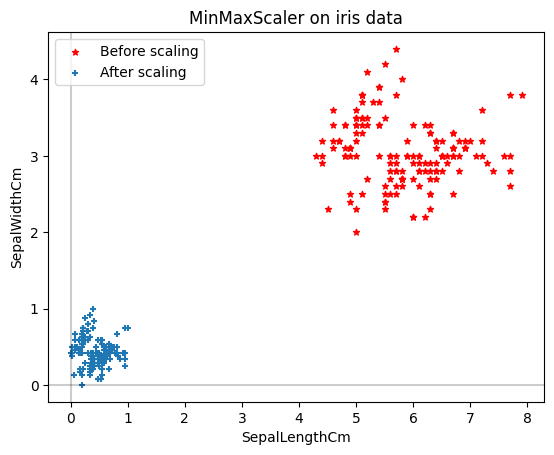

In [9]:
# Scale the data
scale_iris_minmax = MinMaxScaler()
data_iris_minmaxscale_array = scale_iris_minmax.fit_transform(data_iris)

# Store scaled data in a DataFrame
data_iris_minmaxscale_df = pd.DataFrame(data_iris_minmaxscale_array,
                                        columns=data_iris.columns)

# Plot the original data and the scaled data
ax = data_iris.plot.scatter(x="SepalLengthCm",
                            y="SepalWidthCm",
                            marker="*",
                            label="Before scaling",
                            color="red",
                            title="MinMaxScaler on iris data",)

data_iris_minmaxscale_df.plot.scatter(x="SepalLengthCm",
                                      y="SepalWidthCm",
                                      marker="+",
                                      label="After scaling",
                                      ax=ax)

plt.axhline(0, color='black',alpha=0.2)
plt.axvline(0, color='black',alpha=0.2);

## RobustScaler

$$
x_{\text{RobustScaled}} = \frac{x - \text{median}(x)}{\text{percentile}_{75}(x) - \text{percentile}_{25}(x)}
$$

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

### ! QUESTIONS - RobustScaler
- What does this scaler do?
- What is the range of the data after using the scaler?
- What other properties does the data set have after using this scaler?
- When would be appropriate to use this scaler instead of another scaling method?

#### Example of RobustScaler on fruit data

In [ ]:
print("""Raw data before scaling:""")

data_fruit

In [10]:
scale_fruit_robust = RobustScaler()

data_fruit_robustscale_array = scale_fruit_robust.fit_transform(data_fruit)
print("""After scaling: RobustScaler array output""")

data_fruit_robustscale_array

After scaling: RobustScaler array output


array([[ 0.35294118, -0.85714286],
       [ 1.05882353,  0.28571429],
       [-0.35294118, -0.28571429],
       [-0.82352941,  1.42857143]])

In [11]:
data_fruit_robustscale_df = pd.DataFrame(data_fruit_robustscale_array, 
                                 columns=['Weight','Price'],
                                 index = ['Orange','Apple','Banana','Grape'])


print("""After scaling: RobustScaler dataframe output""")
data_fruit_robustscale_df

After scaling: RobustScaler dataframe output


,Weight,Price
Orange,0.352941,-0.857143
Apple,1.058824,0.285714
Banana,-0.352941,-0.285714
Grape,-0.823529,1.428571


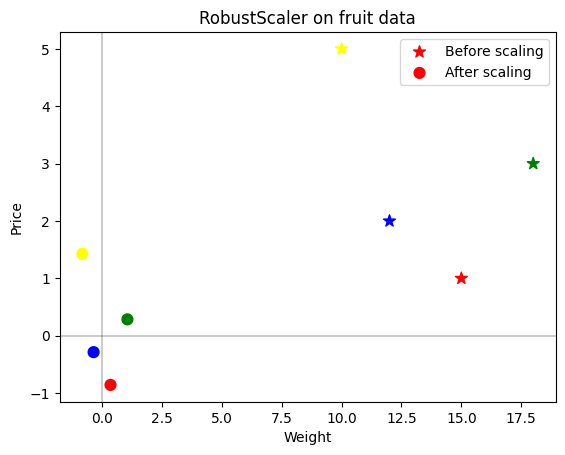

In [12]:
# Plot the original data and the scaled data

ax = data_fruit.plot.scatter(x='Weight',
                                      y='Price',
                                      color=['red','green','blue','yellow'], 
                                      marker = '*',
                                      s=80,
                                      label='Before scaling',
                                      title="RobustScaler on fruit data"
                                      "");

data_fruit_robustscale_df.plot.scatter(x='Weight',
                                       y='Price',
                                       color=['red','green','blue','yellow'],
                                       marker = 'o',
                                       s=60,
                                       label='After scaling',
                                       ax = ax);

plt.axhline(0, color='black',alpha=0.2)
plt.axvline(0, color='black',alpha=0.2);

#### Example of RobustScaler on iris data

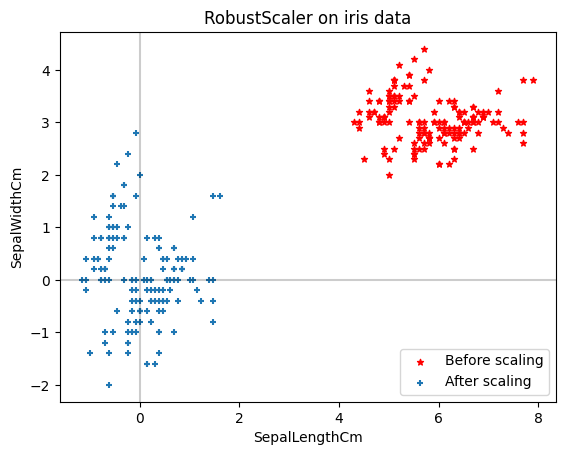

In [13]:
# Scale the data
scale_iris_robust = RobustScaler()
data_iris_robustscale_array = scale_iris_robust.fit_transform(data_iris)

# Store scaled data in a DataFrame
data_iris_robustscale_df = pd.DataFrame(data_iris_robustscale_array,
                                        columns=data_iris.columns)

# Plot the original data and the scaled data
ax = data_iris.plot.scatter(x="SepalLengthCm",
                            y="SepalWidthCm",
                            marker="*",
                            label="Before scaling",
                            color="red",
                            title="RobustScaler on iris data",)

data_iris_robustscale_df.plot.scatter(x="SepalLengthCm",
                                      y="SepalWidthCm",
                                      marker="+",
                                      label="After scaling",
                                      ax=ax)

plt.axhline(0, color='black',alpha=0.2)
plt.axvline(0, color='black',alpha=0.2);

## StandardScaler

$$
x_{\text{StandardScaler}} = \frac{x - mean}{standard\ deviation}
$$

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### ! QUESTIONS - StandardScaler
- What does this scaler do?
- What is the range of the data after using the scaler?
- What other properties does the data set have after using this scaler?
- When would be appropriate to use this scaler instead of another scaling method?

#### Example of StandardScaler on fruit data

In [14]:
print("""Raw data before scaling:""")

data_fruit

Raw data before scaling:


,Weight,Price
Orange,15,1
Apple,18,3
Banana,12,2
Grape,10,5


In [15]:
scale_fruit_standard = StandardScaler()

data_fruit_standardscale_array = scale_fruit_standard.fit_transform(data_fruit)
print("""After scaling: StandardScaler array output""")

data_fruit_standardscale_array

After scaling: StandardScaler array output


array([[ 0.41239305, -1.18321596],
       [ 1.40213637,  0.16903085],
       [-0.57735027, -0.50709255],
       [-1.23717915,  1.52127766]])

In [16]:
data_fruit_standardscale_df = pd.DataFrame(data_fruit_standardscale_array, 
                                 columns=['Weight','Price'],
                                 index = ['Orange','Apple','Banana','Grape'])


print("""After scaling: StandardScaler dataframe output""")
data_fruit_standardscale_df

After scaling: StandardScaler dataframe output


,Weight,Price
Orange,0.412393,-1.183216
Apple,1.402136,0.169031
Banana,-0.577350,-0.507093
Grape,-1.237179,1.521278


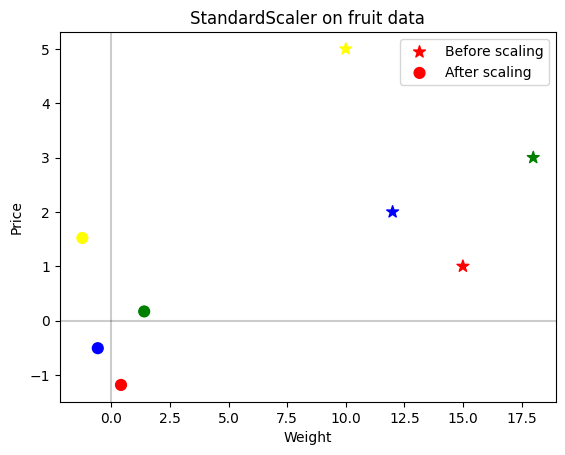

In [17]:
# Plot the original data and the scaled data

ax = data_fruit.plot.scatter(x='Weight',
                                      y='Price',
                                      color=['red','green','blue','yellow'], 
                                      marker = '*',
                                      s=80,
                                      label='Before scaling',
                                      title="StandardScaler on fruit data"
                                      "");

data_fruit_standardscale_df.plot.scatter(x='Weight',
                                       y='Price',
                                       color=['red','green','blue','yellow'],
                                       marker = 'o',
                                       s=60,
                                       label='After scaling',
                                       ax = ax);

plt.axhline(0, color='black',alpha=0.2)
plt.axvline(0, color='black',alpha=0.2);

#### Example of StandardScaler on iris data

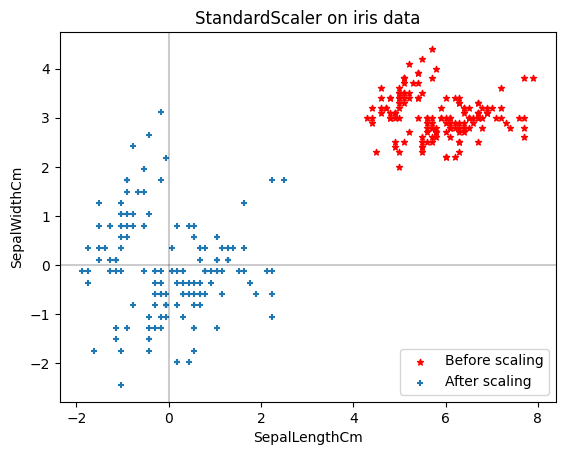

In [18]:
# Scale the data
scale_iris_standard = StandardScaler()
data_iris_standardscale_array = scale_iris_standard.fit_transform(data_iris)

# Store scaled data in a DataFrame
data_iris_standardscale_df = pd.DataFrame(data_iris_standardscale_array,
                                        columns=data_iris.columns)

# Plot the original data and the scaled data
ax = data_iris.plot.scatter(x="SepalLengthCm",
                            y="SepalWidthCm",
                            marker="*",
                            label="Before scaling",
                            color="red",
                            title="StandardScaler on iris data",)

data_iris_standardscale_df.plot.scatter(x="SepalLengthCm",
                                      y="SepalWidthCm",
                                      marker="+",
                                      label="After scaling",
                                      ax=ax)

plt.axhline(0, color='black',alpha=0.2)
plt.axvline(0, color='black',alpha=0.2);